# EM Algorithm - Univariate Gaussian Mixture Model 

In [41]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt

Probability Density Function of Gaussian

In [4]:
def pdf(x, mu, sigma):
    numerator = np.exp((-0.5) * np.square( (x - mu)/sigma ))
    denominator = np.sqrt(2*np.pi)*sigma
    return (numerator/denominator)

## Estimating 2 Component GMM



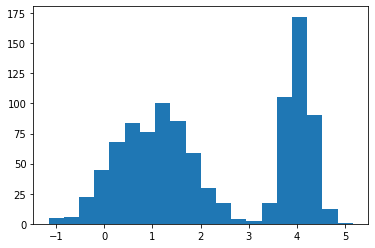

In [50]:
N = 1000
K = 2
mu_1, sigma_1 = 1, 0.7670192403518237
mu_2, sigma_2 = 4, 0.2979386319204766

mus = [mu_1, mu_2]
sigmas = [sigma_1, sigma_2]
priors = [0.6, 0.4]

X1 = np.random.normal(loc=mu_1, scale=sigma_1, size=int(priors[0]*N))
X2 = np.random.normal(loc=mu_2, scale=sigma_2, size=int(priors[1]*N))
X = np.hstack((X1, X2))
plt.hist(X, bins=20)
plt.show()

Random Initialization

In [52]:
lambdas = np.ones((K))/K
means = np.random.choice(X, K)
variances = np.ones((K))/K
variances = np.random.random_sample(size=K)
means, variances, lambdas

(array([4.1857134 , 3.77567422]),
 array([0.58843841, 0.91545355]),
 array([0.5, 0.5]))

Iterate till convergence

In [53]:
for iteration in range(100):
    G = np.zeros((K, N)) #Gamma

    #E-Step
    for k in range(K):
        G[k, :] = pdf(X, means[k], np.sqrt(variances[k])) * lambdas[k]
    G = G / np.sum(G, axis=0)
  
    #M-Step
    means = np.matmul(G, X)
    means /= np.sum(G, axis=1)
    means += 1e-18
    print(means.shape)

    for k in range(K):
        variances[k] = np.matmul(G[k], np.square(X-means[k]))
        variances[k] /= (np.sum(G[k]))
        lambdas[k] = np.mean(G[k])
    
    print(f'Iteration {iteration}: \nmeans - {means}, \nvariances - {variances}, \nlambdas = {lambdas}\n')

(2,)
Iteration 0: 
means - [3.85859536 1.67292499], 
variances - [0.48850416 2.12110578], 
lambdas = [0.24229929 0.75770071]

(2,)
Iteration 1: 
means - [4.02590315 1.49178915], 
variances - [0.12377276 1.76770119], 
lambdas = [0.28046182 0.71953818]

(2,)
Iteration 2: 
means - [4.0532697  1.23672387], 
variances - [0.06782713 1.2050943 ], 
lambdas = [0.34289785 0.65710215]

(2,)
Iteration 3: 
means - [4.05124188 1.08242043], 
variances - [0.06716672 0.81334091], 
lambdas = [0.37728471 0.62271529]

(2,)
Iteration 4: 
means - [4.04413988 1.01324795], 
variances - [0.07331316 0.63134761], 
lambdas = [0.39238068 0.60761932]

(2,)
Iteration 5: 
means - [4.03953048 0.99493525], 
variances - [0.07621176 0.58670225], 
lambdas = [0.39662945 0.60337055]

(2,)
Iteration 6: 
means - [4.03834646 0.99178353], 
variances - [0.0769095 0.5796723], 
lambdas = [0.39740779 0.60259221]

(2,)
Iteration 7: 
means - [4.0381493  0.99129714], 
variances - [0.07702998 0.57860879], 
lambdas = [0.3975297 0.602470

In [54]:
print(f'Results: \nmeans - {means}, \nvariances - {variances}, \nlambdas = {lambdas}\n')

Results: 
means - [4.03811317 0.99120931], 
variances - [0.07705224 0.57841752], 
lambdas = [0.39755178 0.60244822]



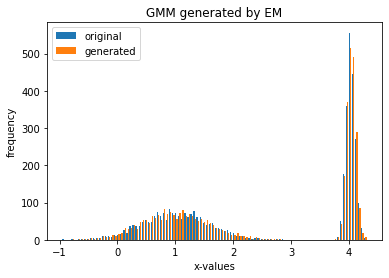

In [62]:
points = []
for k in range(K):
    points.append(np.random.normal(loc=means[k], scale=variances[k], size=2000))
points = np.array(points).reshape(-1, 1)

points2 = []
for k in range(K):
    points2.append(np.random.normal(loc=means[k], scale=variances[k], size=2000))
points2 = np.array(points2).reshape(-1, 1)

points = np.hstack((points, points2))

plt.hist(points, bins=100, label=['original', 'generated'])
plt.legend(prop={'size': 10})
plt.xlabel('x-values')
plt.ylabel('frequency')
plt.title('GMM generated by EM')
plt.show()

## Estimating GMM with 5 Components

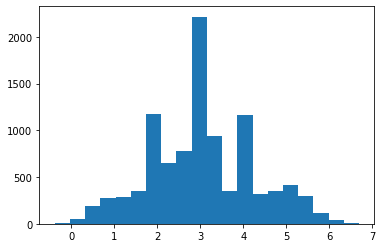

Iteration 0: 
means - [5.01222794 3.84314318 2.00365802 5.99566893 3.54368313], 
variances - [0.03183879 0.55849562 0.53980057 0.04451783 0.63293062], 
lambdas = [0.04444242 0.22432675 0.41960598 0.00809098 0.30353386]

Iteration 1: 
means - [5.0734331  3.79223535 2.06927046 5.89613682 3.46559337], 
variances - [0.04074334 0.70975055 0.63621706 0.05525055 0.66243623], 
lambdas = [0.0407536  0.22045032 0.41556819 0.01106804 0.31215985]

Iteration 2: 
means - [5.1251398  3.75188242 2.11023626 5.81607171 3.40386129], 
variances - [0.04741564 0.79084804 0.69616807 0.05955162 0.64736999], 
lambdas = [0.04188068 0.21672901 0.41324514 0.01366768 0.31447749]

Iteration 3: 
means - [5.15832356 3.7175683  2.13634407 5.76734717 3.35639416], 
variances - [0.05147619 0.83116524 0.73884009 0.0611995  0.62098631], 
lambdas = [0.04454188 0.2131127  0.41114017 0.01565615 0.31554909]

Iteration 4: 
means - [5.17420551 3.6925496  2.15311568 5.74049668 3.32149679], 
variances - [0.05415712 0.85338172 0.77

In [63]:
N = 10000
K = 5
mu_1, sigma_1 = 1, 0.459034464689231
mu_2, sigma_2 = 2, 0.207702519428098
mu_3, sigma_3 = 3, 0.23489427229510515
mu_4, sigma_4 = 4, 0.17162219198716364
mu_5, sigma_5 = 5, 0.5122055673069296

mus = [mu_1, mu_2, mu_3, mu_4, mu_5]
sigmas = [sigma_1, sigma_2, sigma_3, sigma_4, sigma_5]
priors = [0.1, 0.2, 0.4, 0.15, 0.15]

X1 = np.random.normal(loc=mu_1, scale=sigma_1, size=int(priors[0]*N))
X2 = np.random.normal(loc=mu_2, scale=sigma_2, size=int(priors[1]*N))
X3 = np.random.normal(loc=mu_3, scale=sigma_3, size=int(priors[2]*N))
X4 = np.random.normal(loc=mu_4, scale=sigma_4, size=int(priors[3]*N))
X5 = np.random.normal(loc=mu_5, scale=sigma_5, size=int(priors[4]*N))
X = np.hstack((X1, X2, X3, X4, X5))
plt.hist(X, bins=20)
plt.show()

lambdas = np.ones((K))/K
means = np.random.choice(X, K)
variances = np.ones((K))/K
variances = np.random.random_sample(size=K)
means, variances, lambdas

for iteration in range(150):
    G = np.zeros((K, N)) #Gamma

    #E-Step
    for k in range(K):
        G[k, :] = pdf(X, means[k], np.sqrt(variances[k])) * lambdas[k]
    G = G / np.sum(G, axis=0)
  
    #M-Step
    means = np.matmul(G, X)
    means /= np.sum(G, axis=1)
    means += 1e-18

    for k in range(K):
        variances[k] = np.matmul(G[k], np.square(X-means[k]))
        variances[k] /= (np.sum(G[k]))
        lambdas[k] = np.mean(G[k])
    
    print(f'Iteration {iteration}: \nmeans - {means}, \nvariances - {variances}, \nlambdas = {lambdas}\n')

print(f'Results: \nmeans - {means}, \nvariances - {variances}, \nlambdas = {lambdas}\n')

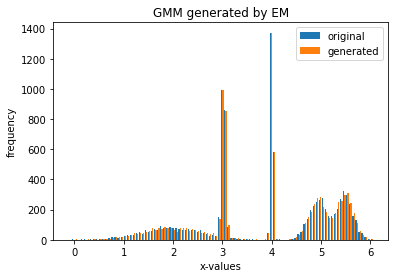

In [64]:
points = []
for k in range(K):
    points.append(np.random.normal(loc=means[k], scale=variances[k], size=2000))
points = np.array(points).reshape(-1, 1)

points2 = []
for k in range(K):
    points2.append(np.random.normal(loc=means[k], scale=variances[k], size=2000))
points2 = np.array(points2).reshape(-1, 1)

points = np.hstack((points, points2))

plt.hist(points, bins=100, label=['original', 'generated'])
plt.legend(prop={'size': 10})
plt.xlabel('x-values')
plt.ylabel('frequency')
plt.title('GMM generated by EM')
plt.show()